In [1]:
# Importing necessary modules
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import re

In [2]:
# Download NLTK resources
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\adars\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\adars\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [3]:
# Load the training dataset
train_df = pd.read_csv('twitter_training.csv')
validation_df = pd.read_csv('twitter_validation.csv')

In [4]:
train_df.columns=['id','information','type','text']
train_df.head()

,id,information,type,text
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [5]:
validation_df.columns=['id','information','type','text']
validation_df.head()

,id,information,type,text
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...


In [6]:
train_df.shape

(74681, 4)

In [7]:
validation_df.shape

(999, 4)

In [8]:
# Check for missing values in the training dataset
print("Missing values in Training Dataset:")
print(train_df.isnull().sum())

Missing values in Training Dataset:
id               0
information      0
type             0
text           686
dtype: int64


In [9]:
# Check for missing values in the validation dataset
print("Missing values in Validation Dataset:")
print(validation_df.isnull().sum())

Missing values in Validation Dataset:
id             0
information    0
type           0
text           0
dtype: int64


In [10]:
train_df = train_df.dropna(subset=['text'])

In [11]:
# Check for missing values in the training dataset
print("Missing values in Training Dataset:")
print(train_df.isnull().sum())

Missing values in Training Dataset:
id             0
information    0
type           0
text           0
dtype: int64


In [12]:
train_df.shape

(73995, 4)

In [13]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 73995 entries, 0 to 74680
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           73995 non-null  int64 
 1   information  73995 non-null  object
 2   type         73995 non-null  object
 3   text         73995 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.8+ MB


In [14]:
# Check the distribution of Emotion
train_df['type'].value_counts()

type
Negative      22358
Positive      20654
Neutral       18108
Irrelevant    12875
Name: count, dtype: int64

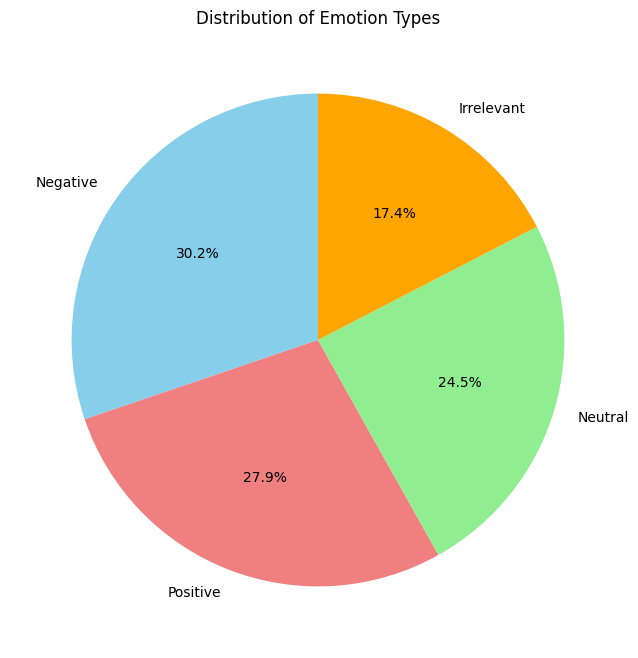

In [15]:
import matplotlib.pyplot as plt

# Check the distribution of the 'type' column
type_counts = train_df['type'].value_counts()

# Define colors for each emotion type
colors = ['skyblue', 'lightcoral', 'lightgreen', 'orange']

# Plotting a pie chart
plt.figure(figsize=(8, 8))
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Distribution of Emotion Types')
plt.show()

In [16]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re
import nltk

# Download NLTK resources before using them
nltk.download('stopwords')
nltk.download('punkt')

# Load stopwords once (not inside the function)
stop_words = set(stopwords.words('english'))

# Function for text preprocessing
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove links and special characters
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Tokenize
    words = word_tokenize(text)
    # Remove stopwords
    words = [word for word in words if word not in stop_words]
    return ' '.join(words)

# Apply to dataframe
train_df['preprocessed_text'] = train_df['text'].apply(preprocess_text)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\adars\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\adars\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [17]:
# Apply the preprocess_text function to the 'text' column
validation_df['preprocessed_text'] = validation_df['text'].apply(preprocess_text)
validation_df

,id,information,type,text,preprocessed_text
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...,bbc news amazon boss jeff bezos rejects claims...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...,microsoft pay word functions poorly samsungus ...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,...",csgo matchmaking full closet hacking truly awf...
3,4433,Google,Neutral,Now the President is slapping Americans in the...,president slapping americans face really commi...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...,hi eahelp ive madeleine mccann cellar past yea...
...,...,...,...,...,...
994,4891,GrandTheftAuto(GTA),Irrelevant,⭐️ Toronto is the arts and culture capital of ...,toronto arts culture capital canada wonder wan...
995,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...,actually good move tot bring viewers one peopl...
996,2652,Borderlands,Positive,Today sucked so it’s time to drink wine n play...,today sucked time drink wine n play borderland...
997,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.,bought fraction microsoft today small wins


In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # You can adjust the 'max_features' parameter based on your dataset

# Fit and transform the training data
tfidf_train_features = tfidf_vectorizer.fit_transform(train_df['preprocessed_text'])

# Transform the validation data using the same vectorizer
tfidf_validation_features = tfidf_vectorizer.transform(validation_df['preprocessed_text'])

# Display the shape of the TF-IDF features
print(f"TF-IDF Training Features Shape: {tfidf_train_features.shape}")
print(f"TF-IDF Validation Features Shape: {tfidf_validation_features.shape}")


TF-IDF Training Features Shape: (73995, 5000)
TF-IDF Validation Features Shape: (999, 5000)


In [20]:
!pip install xgboost


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [21]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Encode the class labels in both training and validation datasets
train_labels_encoded = label_encoder.fit_transform(train_df['type'])
validation_labels_encoded = label_encoder.transform(validation_df['type'])

In [22]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the XGBoost classifier
xgb_classifier = xgb.XGBClassifier()

# Train the classifier on the TF-IDF training features and encoded labels
xgb_classifier.fit(tfidf_train_features, train_labels_encoded)

# Predict the encoded labels for the TF-IDF validation features
validation_predictions_xgb_encoded = xgb_classifier.predict(tfidf_validation_features)

# Decode the predicted labels back to the original class labels
validation_predictions_xgb = label_encoder.inverse_transform(validation_predictions_xgb_encoded)


In [23]:
# Evaluate the performance of the XGBoost classifier
accuracy_xgb = accuracy_score(validation_df['type'], validation_predictions_xgb)
print(f"XGBoost Accuracy: {accuracy_xgb:.2f}")

XGBoost Accuracy: 0.74


In [24]:
# Display additional classification metrics for XGBoost
print("XGBoost Classification Report:")
print(classification_report(validation_df['type'], validation_predictions_xgb))


XGBoost Classification Report:
              precision    recall  f1-score   support

  Irrelevant       0.86      0.61      0.71       171
    Negative       0.65      0.88      0.75       266
     Neutral       0.78      0.64      0.70       285
    Positive       0.78      0.79      0.79       277

    accuracy                           0.74       999
   macro avg       0.77      0.73      0.74       999
weighted avg       0.76      0.74      0.74       999



In [25]:
# Display the confusion matrix for XGBoost
print("XGBoost Confusion Matrix:")
print(confusion_matrix(validation_df['type'], validation_predictions_xgb))

XGBoost Confusion Matrix:
[[104  28  16  23]
 [  2 234  20  10]
 [ 12  61 182  30]
 [  3  38  16 220]]


In [26]:
# Assuming you have defined the preprocess_text function

# Example user input
user_input = "Platinum is the best loot @Borderlands"

# Preprocess the user input
user_input_processed = preprocess_text(user_input)

# Vectorize the user input using TF-IDF
user_input_tfidf = tfidf_vectorizer.transform([user_input_processed])

# Predict the sentiment type using the trained XGBoost model
prediction_encoded = xgb_classifier.predict(user_input_tfidf)[0]

# Decode the predicted label back to the original class label
predicted_type = label_encoder.inverse_transform([prediction_encoded])[0]

print(f"The predicted type for the input text is: {predicted_type}")


The predicted type for the input text is: Positive


In [27]:
# Example user input
user_input = "This is shitty. I get that profit-wise it was less business expected prior to a huge problem."

# Preprocess the user input
user_input_processed = preprocess_text(user_input)

# Vectorize the user input using TF-IDF
user_input_tfidf = tfidf_vectorizer.transform([user_input_processed])

# Predict the sentiment type using the trained XGBoost model
prediction_encoded = xgb_classifier.predict(user_input_tfidf)[0]

# Decode the predicted label back to the original class label
predicted_type = label_encoder.inverse_transform([prediction_encoded])[0]

print(f"The predicted type for the input text is: {predicted_type}")

The predicted type for the input text is: Negative
